A)   
  
Dado el grafo entregado, podemos conlcuir que es un grafo de incidencia nodo-arista, ya que no hay ningun vector conectado consigo mismo, y solamente hay una arista conectando un vertice con otro. De esta forma, podemos usar su definicion para el grafo entregado:


In [568]:
import sympy as sp
import networkx as nx
import matplotlib.pyplot as plt
sp.init_printing(use_unicode=True)

A = sp.Matrix (8,11, lambda i,j: 0) #Definimos una función 8 x 11 (son 8 vectores y 11 aristas)
# Luego, en base a la definicion de la incidencia nodo-arista, vamos a declarar las posiciones del la matriz
#LLEGADAS
A[3,0] = 1 # A1 llega a V4
A[3,4] = 1 # A5 llega a V4
A[3,1] = 1 # A2 llega a V4
A[6,7] = 1 # A8 llega a V7
A[6,5] = 1 # A6 llega a V7
A[6,8] = 1 # A9 llega a V7
A[7,6] = 1 #A7 llega a V8
A[7,9] = 1 #A10 llega a V8
A[7,10] = 1 #A11 llega a V8
A[4,2] = 1 #A3 llega a V5
A[5,3] = 1 #A4 llega a V6
#SALIDAS
A[0,0] = -1 #A1 sale de V1
A[1,1] = -1 #A2 sale de V2
A[1,2] = -1 #A3 sale de V2
A[1,3] = -1 #A4 sale de V2
A[2,4] = -1 #A5 sale de V3
A[2,5] = -1 #A6 sale de V3
A[2,6] = -1 #A7 sale de V3
A[3,7] = -1 #A8 sale de V4
A[4,8] = -1 #A9 sale de V5
A[4,9] = -1 #A10 sale de V5
A[5,10] = -1 #A11 sale de V6


sp.pprint(A)

⎡-1  0   0   0   0   0   0   0   0   0   0 ⎤
⎢                                          ⎥
⎢0   -1  -1  -1  0   0   0   0   0   0   0 ⎥
⎢                                          ⎥
⎢0   0   0   0   -1  -1  -1  0   0   0   0 ⎥
⎢                                          ⎥
⎢1   1   0   0   1   0   0   -1  0   0   0 ⎥
⎢                                          ⎥
⎢0   0   1   0   0   0   0   0   -1  -1  0 ⎥
⎢                                          ⎥
⎢0   0   0   1   0   0   0   0   0   0   -1⎥
⎢                                          ⎥
⎢0   0   0   0   0   1   0   1   1   0   0 ⎥
⎢                                          ⎥
⎣0   0   0   0   0   0   1   0   0   1   1 ⎦


Podemos notar que cada columna representa a una arista, y cada fila representa un nodo. De esta forma, si la columna 5 en la fila 2 tiene un 1, quiere decir que la arista 5 sale del vertice 2.

B)  
  
Notemos los siguientes ciclos cerrados:  
1.- V3 - V4 - V7- V3 (A5, A8, A6)  
2.- V2 - V6 - V8 - V5 - V2 (A4, A11, A10, A3)   
3.- V2 - V5 - V7 - V4 - V2 (A3, A9, A8, A2)  
Luego, observamos su dependencia o independencia entre las columnas correspondientes:  
  
(Note que por teorema del rango, si el rango de una matriz es igual al numero de columnas, significa que el espacio nulo de la matriz tiene dimension 0, osea que Ax=0 solo tendría solucion trivial, por lo que sus columnas serían LI)

In [569]:
#PRIMER CICLO
columnas = [4, 7, 5] #Seleccionamos las columnas de las aristas en cuestión
columnas_de_a = A[:, columnas] #Creamos una matriz con las columnas de A seleccionadas
rango = columnas_de_a.rank() #Calculamos el rango de la matriz
cantidad_de_columnas = len(columnas) #Calculamos la cantidad de columnas de la matriz
if rango == cantidad_de_columnas:
    print("Las columnas del primer ciclo son LI")
else:
    print("Las columnas del primer ciclo son LD")
    

#SEGUNDO CICLO
columnas = [3, 10, 9, 2] 
columnas_de_a = A[:, columnas]
rango = columnas_de_a.rank() 
cantidad_de_columnas = len(columnas)
if rango == cantidad_de_columnas:
    print("Las columnas del segundo ciclo son LI")
else:
    print("Las columnas del segundo ciclo son LD")
    
    
#TERCER CICLO
columnas = [2, 8, 7, 1]
columnas_de_a = A[:, columnas] 
rango = columnas_de_a.rank() 
cantidad_de_columnas = len(columnas) 
if rango == cantidad_de_columnas:
    print("Las columnas del tercer ciclo son LI")
else:
    print("Las columnas del tercer ciclo son LD")

Las columnas del primer ciclo son LD
Las columnas del segundo ciclo son LD
Las columnas del tercer ciclo son LD


C) 
  
Para hallar las aristas que no contengan ciclos cerrados, consideramos las aristas que no están en el conjunto de aristas que forman los ciclos cerrados, es decir, A1 y A7.

Analicemos su dependencia:

In [570]:
columnas = [0,6]
columnas_seleccionadas = A[:, columnas]
sp.pprint(columnas_seleccionadas)
rango = columnas_seleccionadas.rank()
if rango == len(columnas):
    print("Las aristas que no forman ciclos cerrados son LI")
else:
    print("Las aristas que no forman ciclos cerrados son LD")

⎡-1  0 ⎤
⎢      ⎥
⎢0   0 ⎥
⎢      ⎥
⎢0   -1⎥
⎢      ⎥
⎢1   0 ⎥
⎢      ⎥
⎢0   0 ⎥
⎢      ⎥
⎢0   0 ⎥
⎢      ⎥
⎢0   0 ⎥
⎢      ⎥
⎣0   1 ⎦
Las aristas que no forman ciclos cerrados son LI


D)  
  
Como podemos ver, las aristas que forman ciclos cerrados son LD, mientras que las que no, son LI.
Esto tiene toda la lógica del mundo, ya que cuando recorremos un ciclo cerrado, volvemos al punto de orígen, por lo que la suma de las coordenadas de las aristas dan 0, lo que significa que se podrían reescribir como combinaciones lineales de otras aristas.  
  
Mientras que, las que no forman parte de ciclos cerrados, no entregan información redundante, ya que conectan dos vectores que no estaban conectados anteriormente, por lo que no se podría escribir como combinacion lineal de otras aristas.

E)  
  
De las demostraciónes anteriores, tambien podemos concluir que podemos describrir un ciclo como un vector, donde cada elemento es el coeficiente de una arista. Por ejemplo, el vector [0, −1, 1, 0, 0, 0, 0, −1, 1, 0, 0] describe el ciclo de V5 - V7 - V4 - V2 - V5, ya que este ciclo sería:  A9 - A8 - A2 + A3
  
e1)
  
Recordemos que la suma de los vectores de las aristas de un ciclo cerrado dan 0, ya que representan un movimiento nulo, por lo que podemos asumir que el vector que representa un ciclo cerrado forma parte del espacio nulo de la matriz de indicendia nodo-arista. 

In [571]:
vector_ciclo = sp.Matrix([0, -1, 1, 0, 0, 0, 0, -1, 1, 0, 0]) #Escribimos el vector del ciclo descrito en el enunciado
sp.pprint(vector_ciclo)
if A * vector_ciclo == sp.zeros(8,1): ## Vemos si el resultado equivale al vector con 8 filas de 0.       
    print("El vector forma parte del espacio nulo")
else:
    print("El vector no forma parte del espacio nulo")

⎡0 ⎤
⎢  ⎥
⎢-1⎥
⎢  ⎥
⎢1 ⎥
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎢-1⎥
⎢  ⎥
⎢1 ⎥
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎣0 ⎦
El vector forma parte del espacio nulo


e2)  
  
El vector del ciclo V3 - V7 - V4 - V3 se puede escribir considerando las aristas, como sigue:

A6 - A8 - A5 (note que los signos negativos significan que es la dirección opuesta a la de la arista.)

de esta forma, podemos construir el vector del ciclo:

In [572]:
vector_ciclo = sp.Matrix([0, 0, 0, 0, -1, 1, 0, -1, 0, 0, 0]) #Los 0 son las aristas que no forman parte del ciclo
if A * vector_ciclo == sp.zeros(8,1):
    print("El vector del ciclo V3 - V7 - V4 - V3 forma parte del espacio nulo de la matriz de incidencia nodo-arista.")
else:  
    print("El vector del ciclo V3 - V7 - V4 - V3 NO forma parte del espacio nulo de la matriz de incidencia nodo-arista.")

El vector del ciclo V3 - V7 - V4 - V3 forma parte del espacio nulo de la matriz de incidencia nodo-arista.


F)  
  
Según el ciclo descrito, tenemos que el ciclo se representa como : V6 - V2 - V5 - V7 - V4 - V2 - V5 - V8 - V6. Si vemos el grafo, y seguimos este orden, vemos cuales son las aristas que van en direccion esperada y cuales en direccion opuesta. Tenemos : 
-A4 + A3 + A9 - A8 - A2 + A3 + A10 - A11. (note que la arista A3 se recorrió dos veces)
Finalmente, colgamos en un vector los coeficientes de las aristas. (0 si no forman parte del vector). Tenemos el vector [0, -1, 2, -1, 0, 0, 0, -1, 1, 1, -1].
Demostremos que este vector forma parte del espacio nulo de la matriz de incidencia nodo-vector.

In [573]:
vector_ciclo = sp.Matrix([0, -1, 2, -1, 0, 0, 0, -1, 1, 1, -1]) #Declaramos el vector como vector_ciclo
if A * vector_ciclo == sp.zeros(8,1):
    print("El vector forma parte del espacio nulo de la matriz de incidencia arista-nodo")
else:
    print("El vector NO forma parte del espacio nulo de la matriz de incidencia arista-nodo")

El vector forma parte del espacio nulo de la matriz de incidencia arista-nodo


G)  
  
Para hallar una base para el espacio nulo de A, debemos escalonar y reducir la matirz, y resolver el sistema homogéneo Ax = 0.

In [574]:
escalonada_reducida = A.rref()
sp.pprint(escalonada_reducida)


⎛⎡1  0  0  0  0  0  0  0   0   0   0 ⎤                       ⎞
⎜⎢                                   ⎥                       ⎟
⎜⎢0  1  0  0  0  0  0  0   1   1   1 ⎥                       ⎟
⎜⎢                                   ⎥                       ⎟
⎜⎢0  0  1  0  0  0  0  0   -1  -1  0 ⎥                       ⎟
⎜⎢                                   ⎥                       ⎟
⎜⎢0  0  0  1  0  0  0  0   0   0   -1⎥                       ⎟
⎜⎢                                   ⎥, (0, 1, 2, 3, 4, 5, 6)⎟
⎜⎢0  0  0  0  1  0  0  -1  -1  -1  -1⎥                       ⎟
⎜⎢                                   ⎥                       ⎟
⎜⎢0  0  0  0  0  1  0  1   1   0   0 ⎥                       ⎟
⎜⎢                                   ⎥                       ⎟
⎜⎢0  0  0  0  0  0  1  0   0   1   1 ⎥                       ⎟
⎜⎢                                   ⎥                       ⎟
⎝⎣0  0  0  0  0  0  0  0   0   0   0 ⎦                       ⎠


Note que X8, X9, X10, X11 son variables libres, luego:
  
x1 = 0  
x2 = -X9 -X10 -X11  
x3 = X9 + X10  
x4 = X11  
x5 = X8 + X9 + X10 + X11  
x6 = -X8 - X9  
x7 =  -X10 -X11  
  
Después, escribimos la solucion general con las variables libres:

In [575]:
nul_a = sp.Matrix([[0,0,0,0,1,-1,0,1,0,0,0], [0,-1,1,0,1,-1,0,0,1,0,0],[0,-1,1,0,1,0,-1,0,0,1,0],
                   [0,-1,0,1,1,0,-1,0,0,0,1]]).T
print("Nul(A) = \n")
sp.pprint(nul_a)

Nul(A) = 

⎡0   0   0   0 ⎤
⎢              ⎥
⎢0   -1  -1  -1⎥
⎢              ⎥
⎢0   1   1   0 ⎥
⎢              ⎥
⎢0   0   0   1 ⎥
⎢              ⎥
⎢1   1   1   1 ⎥
⎢              ⎥
⎢-1  -1  0   0 ⎥
⎢              ⎥
⎢0   0   -1  -1⎥
⎢              ⎥
⎢1   0   0   0 ⎥
⎢              ⎥
⎢0   1   0   0 ⎥
⎢              ⎥
⎢0   0   1   0 ⎥
⎢              ⎥
⎣0   0   0   1 ⎦


Note que también podemos hallar una base de este espacio usando el comadno .nullspace():

In [576]:
nul_a = A.nullspace()
sp.pprint(nul_a)

⎡⎡0 ⎤  ⎡0 ⎤  ⎡0 ⎤  ⎡0 ⎤⎤
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎢⎢0 ⎥  ⎢-1⎥  ⎢-1⎥  ⎢-1⎥⎥
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎢⎢0 ⎥  ⎢1 ⎥  ⎢1 ⎥  ⎢0 ⎥⎥
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎢⎢0 ⎥  ⎢0 ⎥  ⎢0 ⎥  ⎢1 ⎥⎥
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎢⎢1 ⎥  ⎢1 ⎥  ⎢1 ⎥  ⎢1 ⎥⎥
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎢⎢-1⎥, ⎢-1⎥, ⎢0 ⎥, ⎢0 ⎥⎥
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎢⎢0 ⎥  ⎢0 ⎥  ⎢-1⎥  ⎢-1⎥⎥
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎢⎢1 ⎥  ⎢0 ⎥  ⎢0 ⎥  ⎢0 ⎥⎥
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎢⎢0 ⎥  ⎢1 ⎥  ⎢0 ⎥  ⎢0 ⎥⎥
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎢⎢0 ⎥  ⎢0 ⎥  ⎢1 ⎥  ⎢0 ⎥⎥
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎣⎣0 ⎦  ⎣0 ⎦  ⎣0 ⎦  ⎣1 ⎦⎦


H)  
  
Para dibujar los ciclos descritos por los vectores de la base del espacio nulo, describimos cada vector en base a las aristas:  
  
vector 1 = A5 + A8 - A6  
(V3-V4-V7-V3)  
  
vector 2 = A5 - A2 + A3 + A9 - A6  
(V3-V4-V2-V5-V7-V3)  
  
vector 3 = -A7 + A5 - A2 + A3 + A10  
(V8-V3-V4-V2-V5-V8)  
  
vector 4 = -A2 + A4 + A11 - A7 + A5  
(V4-V2-V6-V8-V3-V4)  
  
Luego, modifcaremos el código de la sesion 6: 

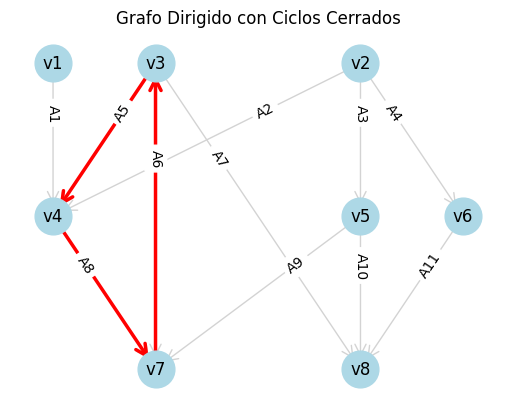

In [577]:
# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos (vértices)
nodos = ["v1", "v2", "v3", "v4", "v5", "v6", "v7", "v8"]
G.add_nodes_from(nodos)

# Agregar aristas (con direcciones según el gráfico)
aristas = [
    ("v1", "v4", "A1"),
    ("v2", "v4", "A2"),
    ("v2", "v5", "A3"),
    ("v2", "v6", "A4"),
    ("v3", "v4", "A5"),
    ("v3", "v7", "A6"),
    ("v3", "v8", "A7"),
    ("v4", "v7", "A8"),
    ("v5", "v7", "A9"),
    ("v5", "v8", "A10"),
    ("v6", "v8", "A11"),
    
]

# Agregar las aristas con etiquetas
for (u, v, label) in aristas:
    G.add_edge(u, v, label=label)

# Definir el ciclo y colorear las aristas del ciclo en rojo
ciclo1 = [("v3", "v4"), ("v4", "v7"), ("v7", "v3")] # Primer vector de la base de Nul(A)
# Posición manual de los nodos para que se asemeje al grafo original
pos = {
    "v1": (0, 5),
    "v2": (3, 5),
    "v3": (1, 5),
    "v4": (0, 2.5),
    "v5": (3, 2.5),
    "v6": (4, 2.5),
    "v7": (1, 0),
    "v8": (3, 0)
}

# Dibujar los nodos
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="lightblue")

# Dibujar todas las aristas en gris claro inicialmente
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for (u, v, _) in aristas], edge_color="lightgray", arrowstyle="->", arrowsize=20)

# Dibujar las aristas de los ciclos en colores diferentes
nx.draw_networkx_edges(G, pos, edgelist=ciclo1, edge_color="red", width=2.5, arrowstyle="->", arrowsize=20, label="Ciclo 1")

# Dibujar etiquetas de nodos
nx.draw_networkx_labels(G, pos, font_size=12, font_color="black")

# Dibujar etiquetas de aristas
edge_labels = {(u, v): label for (u, v, label) in aristas}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, label_pos=0.3)

# Mostrar el grafo
plt.title("Grafo Dirigido con Ciclos Cerrados")
plt.axis("off")
plt.show()

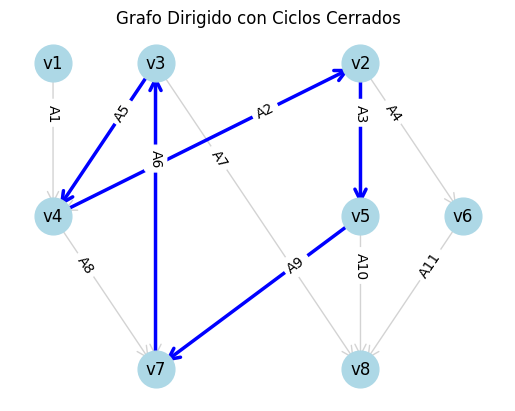

In [578]:
# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos (vértices)
nodos = ["v1", "v2", "v3", "v4", "v5", "v6", "v7", "v8"]
G.add_nodes_from(nodos)

# Agregar aristas (con direcciones según el gráfico)
aristas = [
    ("v1", "v4", "A1"),
    ("v2", "v4", "A2"),
    ("v2", "v5", "A3"),
    ("v2", "v6", "A4"),
    ("v3", "v4", "A5"),
    ("v3", "v7", "A6"),
    ("v3", "v8", "A7"),
    ("v4", "v7", "A8"),
    ("v5", "v7", "A9"),
    ("v5", "v8", "A10"),
    ("v6", "v8", "A11"),
    
]

# Agregar las aristas con etiquetas
for (u, v, label) in aristas:
    G.add_edge(u, v, label=label)

# Definir el ciclo y colorear las aristas del ciclo en rojo
ciclo2 = [("v3", "v4"), ("v4","v2"), ("v2", "v5"), ("v5", "v7"), ("v7", "v3")] # Segundo vector de la base de Nul(A)
# Posición manual de los nodos para que se asemeje al grafo original
pos = {
    "v1": (0, 5),
    "v2": (3, 5),
    "v3": (1, 5),
    "v4": (0, 2.5),
    "v5": (3, 2.5),
    "v6": (4, 2.5),
    "v7": (1, 0),
    "v8": (3, 0)
}

# Dibujar los nodos
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="lightblue")

# Dibujar todas las aristas en gris claro inicialmente
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for (u, v, _) in aristas], edge_color="lightgray", arrowstyle="->", arrowsize=20)

# Dibujar las aristas de los ciclos en colores diferentes
nx.draw_networkx_edges(G, pos, edgelist=ciclo2, edge_color="blue", width=2.5, arrowstyle="->", arrowsize=20, label="Ciclo 2")

# Dibujar etiquetas de nodos
nx.draw_networkx_labels(G, pos, font_size=12, font_color="black")

# Dibujar etiquetas de aristas
edge_labels = {(u, v): label for (u, v, label) in aristas}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, label_pos=0.3)

# Mostrar el grafo
plt.title("Grafo Dirigido con Ciclos Cerrados")
plt.axis("off")
plt.show()

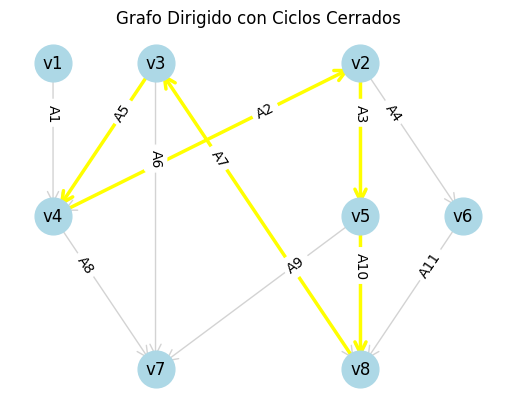

In [579]:
# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos (vértices)
nodos = ["v1", "v2", "v3", "v4", "v5", "v6", "v7", "v8"]
G.add_nodes_from(nodos)

# Agregar aristas (con direcciones según el gráfico)
aristas = [
    ("v1", "v4", "A1"),
    ("v2", "v4", "A2"),
    ("v2", "v5", "A3"),
    ("v2", "v6", "A4"),
    ("v3", "v4", "A5"),
    ("v3", "v7", "A6"),
    ("v3", "v8", "A7"),
    ("v4", "v7", "A8"),
    ("v5", "v7", "A9"),
    ("v5", "v8", "A10"),
    ("v6", "v8", "A11"),
    
]

# Agregar las aristas con etiquetas
for (u, v, label) in aristas:
    G.add_edge(u, v, label=label)

# Definir el ciclo y colorear las aristas del ciclo en rojo
ciclo3 = [("v8", "v3"), ("v3", "v4"), ("v4", "v2"), ("v2", "v5"), ("v5", "v8")] # Tercer vector de la base de Nul(A)
# Posición manual de los nodos para que se asemeje al grafo original
pos = {
    "v1": (0, 5),
    "v2": (3, 5),
    "v3": (1, 5),
    "v4": (0, 2.5),
    "v5": (3, 2.5),
    "v6": (4, 2.5),
    "v7": (1, 0),
    "v8": (3, 0)
}

# Dibujar los nodos
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="lightblue")

# Dibujar todas las aristas en gris claro inicialmente
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for (u, v, _) in aristas], edge_color="lightgray", arrowstyle="->", arrowsize=20)

# Dibujar las aristas de los ciclos en colores diferentes
nx.draw_networkx_edges(G, pos, edgelist=ciclo3, edge_color="yellow", width=2.5, arrowstyle="->", arrowsize=20, label="Ciclo 3")
# Dibujar etiquetas de nodos
nx.draw_networkx_labels(G, pos, font_size=12, font_color="black")

# Dibujar etiquetas de aristas
edge_labels = {(u, v): label for (u, v, label) in aristas}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, label_pos=0.3)

# Mostrar el grafo
plt.title("Grafo Dirigido con Ciclos Cerrados")
plt.axis("off")
plt.show()

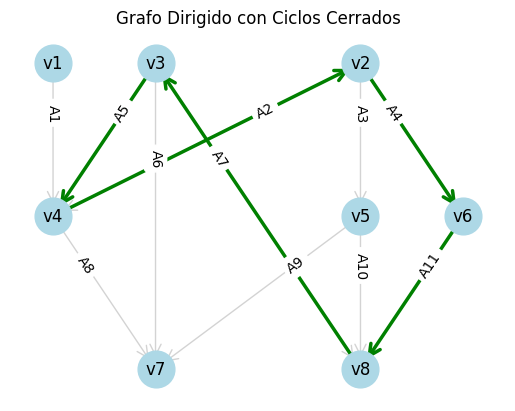

In [580]:
# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos (vértices)
nodos = ["v1", "v2", "v3", "v4", "v5", "v6", "v7", "v8"]
G.add_nodes_from(nodos)

# Agregar aristas (con direcciones según el gráfico)
aristas = [
    ("v1", "v4", "A1"),
    ("v2", "v4", "A2"),
    ("v2", "v5", "A3"),
    ("v2", "v6", "A4"),
    ("v3", "v4", "A5"),
    ("v3", "v7", "A6"),
    ("v3", "v8", "A7"),
    ("v4", "v7", "A8"),
    ("v5", "v7", "A9"),
    ("v5", "v8", "A10"),
    ("v6", "v8", "A11"),
    
]

# Agregar las aristas con etiquetas
for (u, v, label) in aristas:
    G.add_edge(u, v, label=label)

# Definir el ciclo y colorear las aristas del ciclo en rojo
ciclo4 = [("v4", "v2"), ("v2", "v6"), ("v6", "v8"), ("v8", "v3"), ("v3", "v4")] # Cuarto vector de la base de Nul(A) 
# Posición manual de los nodos para que se asemeje al grafo original
pos = {
    "v1": (0, 5),
    "v2": (3, 5),
    "v3": (1, 5),
    "v4": (0, 2.5),
    "v5": (3, 2.5),
    "v6": (4, 2.5),
    "v7": (1, 0),
    "v8": (3, 0)
}

# Dibujar los nodos
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="lightblue")

# Dibujar todas las aristas en gris claro inicialmente
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for (u, v, _) in aristas], edge_color="lightgray", arrowstyle="->", arrowsize=20)

# Dibujar las aristas de los ciclos en colores diferentes
nx.draw_networkx_edges(G, pos, edgelist=ciclo4, edge_color="green", width=2.5, arrowstyle="->", arrowsize=20, label="Ciclo 4")
# Dibujar etiquetas de nodos
nx.draw_networkx_labels(G, pos, font_size=12, font_color="black")

# Dibujar etiquetas de aristas
edge_labels = {(u, v): label for (u, v, label) in aristas}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, label_pos=0.3)

# Mostrar el grafo
plt.title("Grafo Dirigido con Ciclos Cerrados")
plt.axis("off")
plt.show()